# importing libarary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import urllib 
from urllib import request
import requests
import re
import json
import pprint as pp
import random
import seaborn as sns

In [2]:
import os
wd = os.getcwd()

if wd[0] == '/' : # mac os
    
    import platform

    from matplotlib import font_manager, rc
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin' :
        rc('font', family = 'Applegothic')
    elif platform.system() == 'Windows' :
        path = 'c:/Window/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family = font_name)
    else : 
        print('Unknow system') 

    # Mac OS matplotlib 한글 폰트 지원
    
else : 
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    # Windows matplotlib 한글폰트 지원

# reading data

In [121]:
s4 = pd.read_csv('s4.csv', encoding = 'cp949', index_col = 0)

In [122]:
s4_rt01 = pd.read_csv('s4_rt01.csv', encoding = 'cp949', index_col = 0)
s4_rt02 = pd.read_csv('s4_rt02.csv', encoding = 'cp949', index_col = 0)
s4_rt03 = pd.read_csv('s4_rt03.csv', encoding = 'cp949', index_col = 0)

In [123]:
s4_rtTotal = pd.concat([s4_rt01, s4_rt02, s4_rt03]).reset_index(drop = True)

# plotting

In [124]:
rt_piv = pd.pivot_table(s4_rtTotal, index = ['name', 'date'], values = ['ratio']).reset_index()
final = s4[s4['rank3rd'] < 21].sort_values(by = 'rank3rd') # 생방송 진출자
final = final.sort_values(by = 'final_rank').reset_index(drop = True)

df_final = []

for i in range(len(final)) : 
    
    tmp_df = rt_piv[rt_piv['name'] == final['name'][i]]
    df_final.append(tmp_df)
    
df_final = pd.concat(df_final).reset_index(drop = True)
df_final.set_index('date', inplace = True) # 인덱스 재설정, 구별 기준으로 변인간 비교하기 위해 재설정

<function matplotlib.pyplot.show(*args, **kw)>

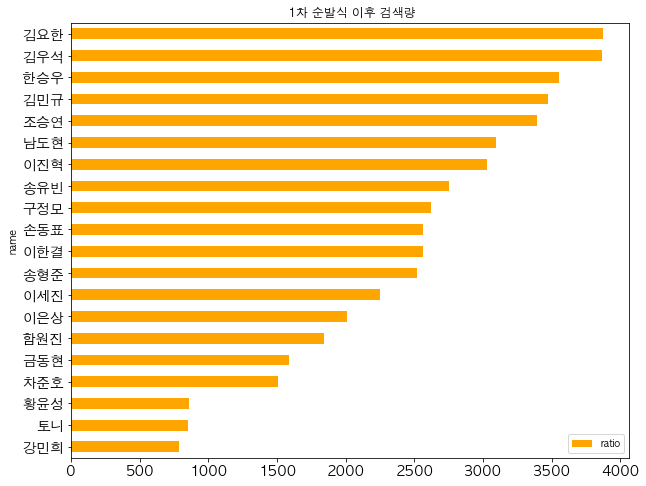

In [141]:
tmp_final = df_final.reset_index()
tmp_final = tmp_final[tmp_final['date']>'2019-05-31'].reset_index(drop = True)

rt0203 = pd.pivot_table(tmp_final, 
                     index = ['name'], 
                     values = ['ratio'], 
                     aggfunc = np.sum).reset_index().sort_values(by = 'ratio').reset_index(drop = True)

rt0203 = rt0203.set_index('name')

rt0203.plot(kind = 'barh', figsize = (10, 8),
            color = 'orange', 
            fontsize = 14,
            title = ' 1차 순발식 이후 검색량')

# plt.savefig('s4_1차이후검색량')

plt.show

In [16]:
s4_rank01 = df_final[df_final['name'] == final['name'][0]]
s4_rank02 = df_final[df_final['name'] == final['name'][1]]
s4_rank03 = df_final[df_final['name'] == final['name'][2]]
s4_rank04 = df_final[df_final['name'] == final['name'][3]]
s4_rank05 = df_final[df_final['name'] == final['name'][4]]
s4_rank06 = df_final[df_final['name'] == final['name'][5]]
s4_rank07 = df_final[df_final['name'] == final['name'][6]]
s4_rank08 = df_final[df_final['name'] == final['name'][7]]
s4_rank09 = df_final[df_final['name'] == final['name'][8]]
s4_rank10 = df_final[df_final['name'] == final['name'][9]]
s4_rank11 = df_final[df_final['name'] == final['name'][10]]
s4_rank12 = df_final[df_final['name'] == final['name'][11]]
s4_rank13 = df_final[df_final['name'] == final['name'][12]]
s4_rank14 = df_final[df_final['name'] == final['name'][13]]
s4_rank15 = df_final[df_final['name'] == final['name'][14]]
s4_rank16 = df_final[df_final['name'] == final['name'][15]]
s4_rank17 = df_final[df_final['name'] == final['name'][16]]
s4_rank18 = df_final[df_final['name'] == final['name'][17]]
s4_rank19 = df_final[df_final['name'] == final['name'][18]]
s4_rank20 = df_final[df_final['name'] == final['name'][19]]

In [17]:
final_name = df_final['name'].unique()

In [18]:
final_name

array(['김요한', '김우석', '이진혁', '한승우', '김민규', '조승연', '남도현', '송형준', '이은상',
       '금동현', '차준호', '손동표', '황윤성', '강민희', '구정모', '이한결', '송유빈', '함원진',
       '토니', '이세진'], dtype=object)

지난 분석에서 2차 순발식 순위와 최종 순위 상관도가 가장 높아 <br>
2차 순발식 순위대로 그래프를 그려보았다.

- 2차 순발식 1위부터 10위

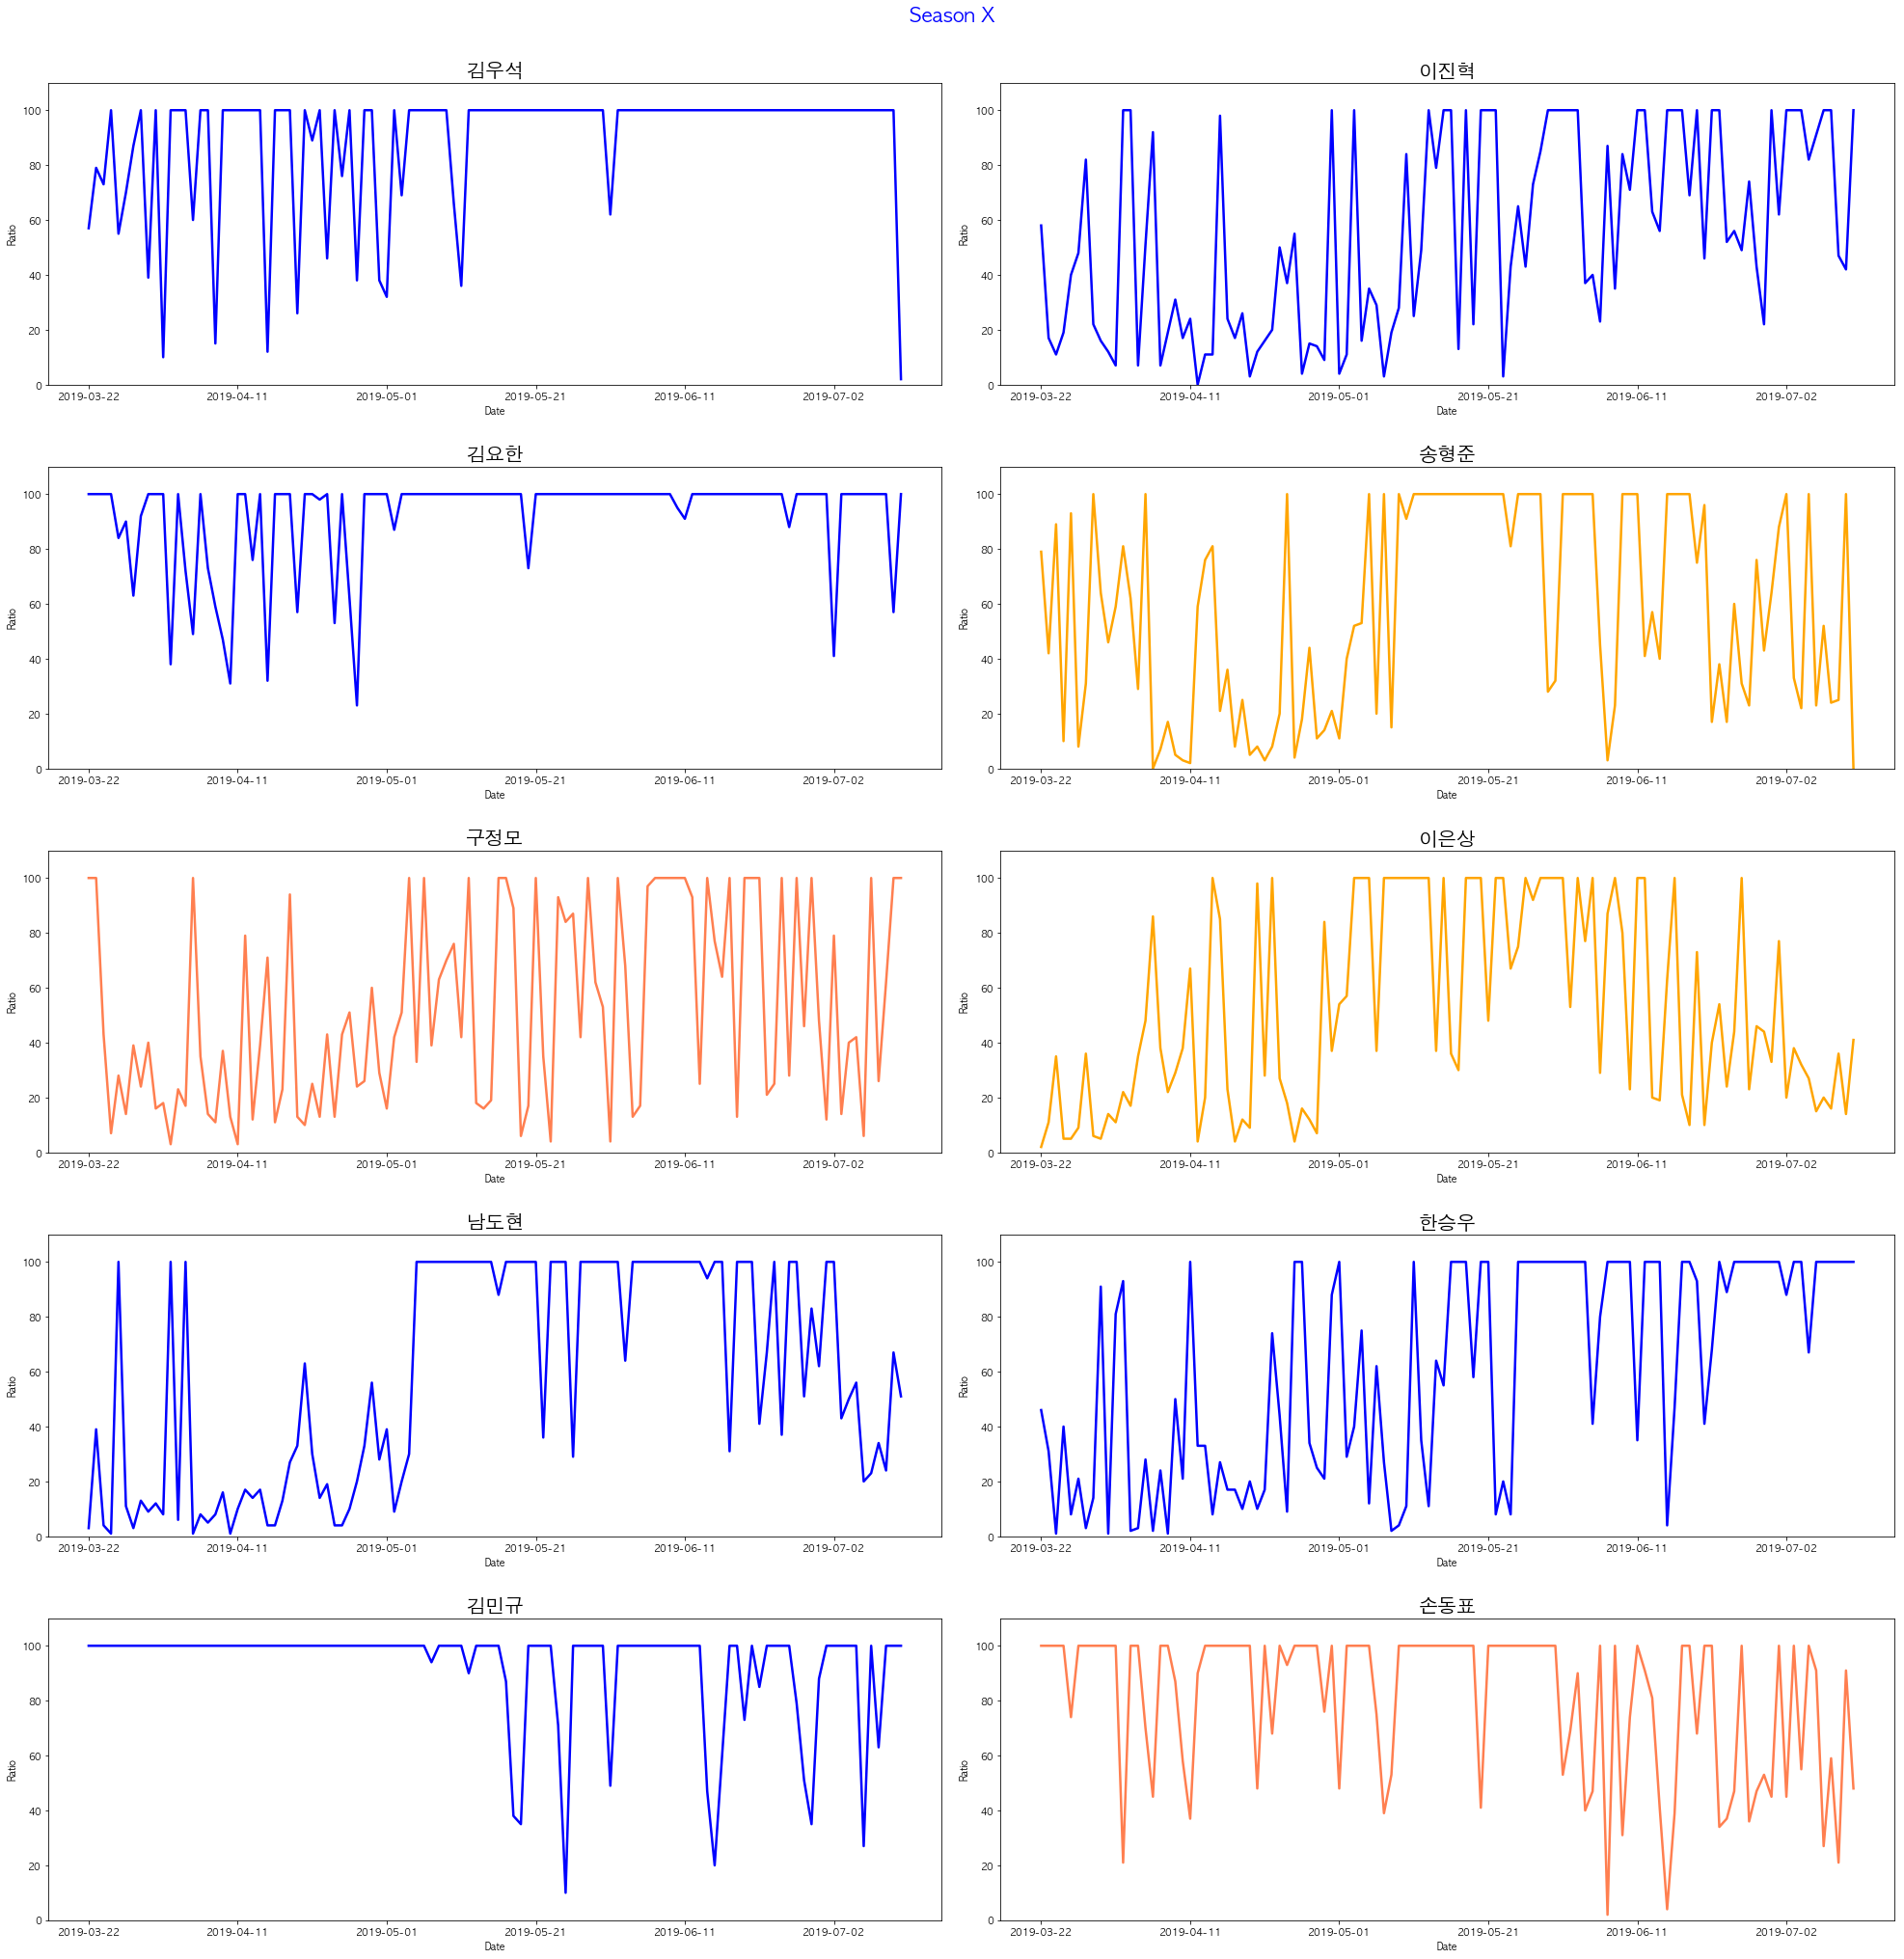

In [142]:
fig = plt.figure(figsize = (30,30))
fig.suptitle('Season X', fontsize = 20, fontweight = 'bold', color = 'b')


ax1 = fig.add_subplot(5, 2, 1)
ax1.set_title('김우석', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank02.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank02['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 2)
ax1.set_title('이진혁', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank03['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 3)
ax1.set_title('김요한', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank01.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank01['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 4)
ax1.set_title('송형준', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank08['ratio'], color = 'orange', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 5)
ax1.set_title('구정모', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank15.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank15['ratio'], color = 'coral', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 6)
ax1.set_title('이은상', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank09['ratio'], color = 'orange', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 7)
ax1.set_title('남도현', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank07['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 8)
ax1.set_title('한승우', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank04['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 9)
ax1.set_title('김민규', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank05['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 10)
ax1.set_title('손동표', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank12['ratio'], color = 'coral', linewidth = 2.5)

plt.tight_layout(pad = 10, w_pad = 1.5, h_pad = 3.0)

# plt.savefig('s4_전체그래프01')

plt.show()

 - 2차 순발식 11위 부터 20위

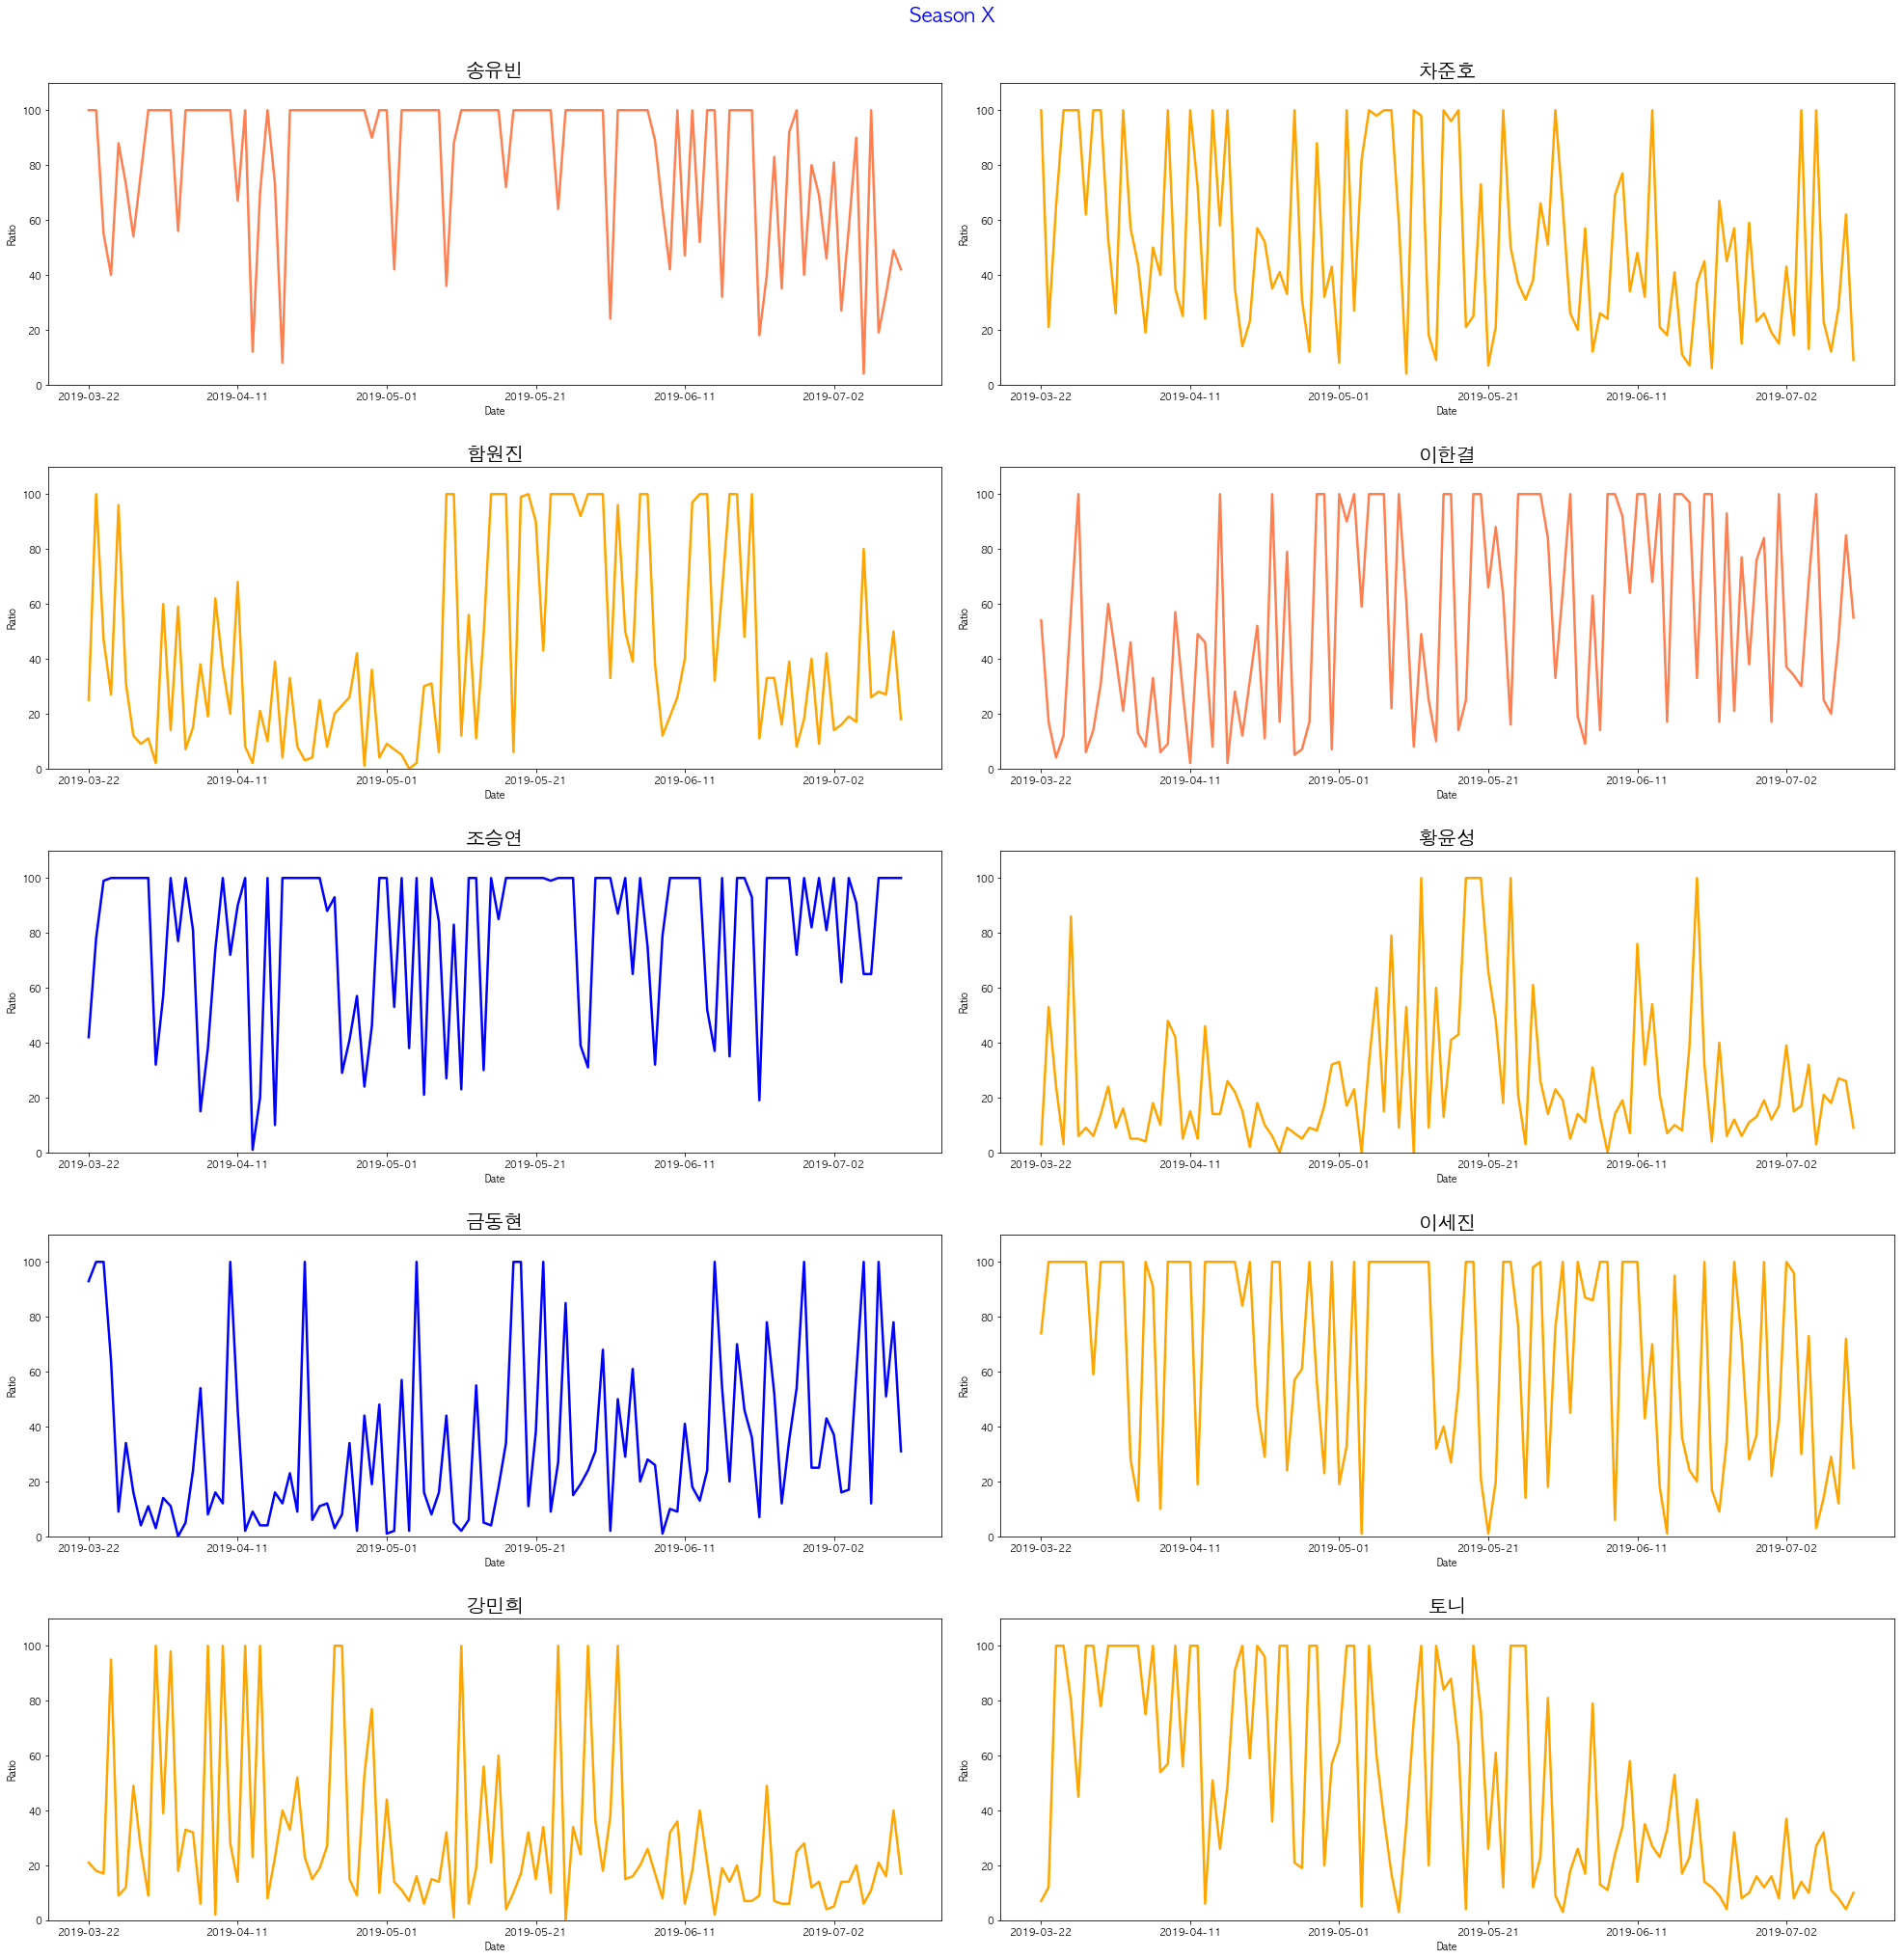

In [143]:
fig = plt.figure(figsize = (30,30))
fig.suptitle('Season X', fontsize = 20, fontweight = 'bold', color = 'b')


ax1 = fig.add_subplot(5, 2, 1)
ax1.set_title('송유빈', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank17.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank17['ratio'], color = 'coral', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 2)
ax1.set_title('차준호', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank11['ratio'], color = 'orange', linewidth = 2.5)


ax1 = fig.add_subplot(5, 2, 3)
ax1.set_title('함원진', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank01.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank18['ratio'], color = 'orange', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 4)
ax1.set_title('이한결', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank16['ratio'], color = 'coral', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 5)
ax1.set_title('조승연', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank15.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank06['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 6)
ax1.set_title('황윤성', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank13['ratio'], color = 'orange', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 7)
ax1.set_title('금동현', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank10['ratio'], color = 'b', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 8)
ax1.set_title('이세진', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank20['ratio'], color = 'orange', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 9)
ax1.set_title('강민희', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank03.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank14['ratio'], color = 'orange', linewidth = 2.5)

ax1 = fig.add_subplot(5, 2, 10)
ax1.set_title('토니', size = 20)
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Ratio', fontsize = 10)
ax1.set_xticks(np.arange(0, len(s4_rank12.index), 20))
ax1.set_ylim([0, 110])
ax1.plot(s4_rank19['ratio'], color = 'orange', linewidth = 2.5)

# plt.savefig('s4_전체그래프02')

plt.tight_layout(pad = 10, w_pad = 1.5, h_pad = 3.0)
plt.show()